# Übung 3 | Gravitation


## Plot des Gravitationspotentials

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
from tqdm import tqdm # for progress bars
import matplotlib.patches as mpatches

In [2]:
G = 0.0000000000667428 # in Nm^2 * kg^-2
R_e = 6371 * 10**3 # in m

prel_earth_ref_mod = pandas.read_csv("Data/preliminary_earth_reference_model.csv")
prel_earth_ref_mod *= 10**3 # all values in m or kg/m^3

In [3]:
def potential_integration_inner(R, B, C, D, E):
    return B * R**2 / 2 + C * R**3 / (3 * R_e) + D * R**4 / (4 * R_e**2) + E * R**5 / (5 * R_e**3)

def potential_integration_outer(R, B, C, D, E):
    return B * R**3 / 3 + C * R**4 / (4 * R_e) + D * R**5 / (5 * R_e**2) + E * R**6 / (6 * R_e**3)

In [4]:
def g_potential_inner(R_lower, R_upper, B, C, D, E):
    lower = potential_integration_inner(R_lower, B, C, D, E)
    upper = potential_integration_inner(R_upper, B, C, D, E)

    return 4 * np.pi * G * (upper - lower)

def g_potential_outer(R_lower, R_upper, d, B, C, D, E):
    lower = potential_integration_outer(R_lower, B, C, D, E)
    upper = potential_integration_outer(R_upper, B, C, D, E)

    return 4 * np.pi * G * (upper - lower) / d

### Test in Mittelpunkt der Erde

In [5]:
potential_per_shell = []
for index in prel_earth_ref_mod.index:
    R_lower = prel_earth_ref_mod.rmin[index]
    R_upper = prel_earth_ref_mod.rmax[index]

    B = prel_earth_ref_mod.B[index] 
    C = prel_earth_ref_mod.C[index]
    D = prel_earth_ref_mod.D[index]
    E = prel_earth_ref_mod.E[index]
    
    potential_per_shell.append(g_potential_inner(R_lower, R_upper, B, C, D, E))

prel_earth_ref_mod["potential_per_shell_in_middle"] = potential_per_shell
del potential_per_shell

# Plot der Gravitationsbeschleunigung

In [6]:
d = range(0, 4000000 * 10^3, 1000)
potential = []

for distance in tqdm(d):
    pot_per_distance = 0

    for index in prel_earth_ref_mod.index:
        R_lower = prel_earth_ref_mod.rmin[index]
        R_upper = prel_earth_ref_mod.rmax[index]

        B = prel_earth_ref_mod.B[index]
        C = prel_earth_ref_mod.C[index]
        D = prel_earth_ref_mod.D[index]
        E = prel_earth_ref_mod.E[index]

        if distance > R_upper:
            pot_per_distance += g_potential_outer(R_lower, R_upper, distance, B, C, D, E,)
        elif distance <= R_lower:
            pot_per_distance += g_potential_inner(R_lower, R_upper, B, C, D, E)
        else: pot_per_distance += g_potential_inner(distance, R_upper, B, C, D, E) + g_potential_outer(R_lower, distance, distance, B, C, D, E,)
    
    potential.append(pot_per_distance)

100%|██████████| 40001/40001 [00:17<00:00, 2288.81it/s]


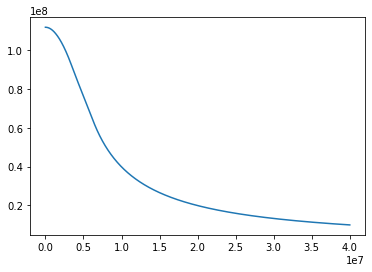

In [7]:
plt.plot(d, potential)

In [8]:
d = range(0, 4000000 * 10^3, 1000)
acc = []

for distance in tqdm(d):
    pot_per_distance = 0

    for index in prel_earth_ref_mod.index:
        R_lower = prel_earth_ref_mod.rmin[index]
        R_upper = prel_earth_ref_mod.rmax[index]

        B = prel_earth_ref_mod.B[index]
        C = prel_earth_ref_mod.C[index]
        D = prel_earth_ref_mod.D[index]
        E = prel_earth_ref_mod.E[index]

        if distance > R_upper:
            pot_per_distance += g_potential_outer(R_lower, R_upper, distance**2, B, C, D, E,)
        elif distance <= R_lower:
            pot_per_distance += 0
        else: pot_per_distance += g_potential_outer(R_lower, distance, distance**2, B, C, D, E,)
    
    acc.append(pot_per_distance)

100%|██████████| 40001/40001 [00:17<00:00, 2339.84it/s]


Text(0.3, 0.6, 'Maximale Beschleunigung: -10.69 ms^(-2) \nbei 3480 km. \n\nBei R = 6371 km ist die \nBeschleunigung ca. -9.82 ms^(-2)')

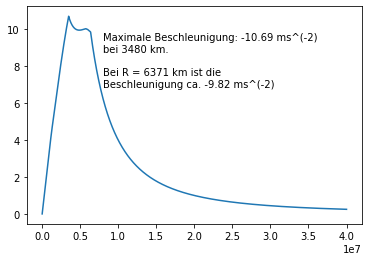

In [29]:
plt.plot(d, acc)
plt.figtext(0.3,0.6, "Maximale Beschleunigung: -" + str(round(max(acc),2)) + " ms^(-2) \nbei " + str(acc.index(max(acc))) + " km. \n\nBei R = 6371 km ist die \nBeschleunigung ca. -" + str(round(acc[6371],2)) + " ms^(-2)")

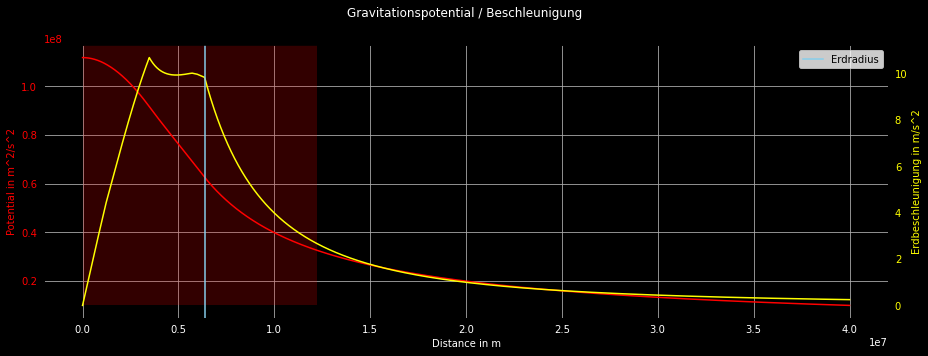

In [43]:
fig, ax1 = plt.subplots(figsize=(13,5))
fig.suptitle("Gravitationspotential / Beschleunigung", color="white")


color = 'red'
ax1.set_xlabel('Distance in m', color="white")
ax1.set_ylabel('Potential in m^2/s^2', color=color)
ax1.plot(d, potential, color=color, label='Gravitationspotential')
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', labelcolor="white")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'yellow'
ax2.set_ylabel('Erdbeschleunigung in m/s^2', color=color)
ax2.plot(d, acc, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.axvline(x=R_e, ymin=0, ymax=1, color="skyblue", label='Erdradius')

ax2.legend(loc=0)

left, bottom, width, height = (0, 0, 1221 * 10000, 10000000)
rect=mpatches.Rectangle((left,bottom),width,height, 
                        #fill=False,
                        alpha=0.2,
                        #color="purple",
                       #linewidth=2,
                       facecolor="red")
plt.gca().add_patch(rect)
# add text with text() function in matplotlib
#plt.text(31, 21.3,'rectangle',fontsize=16, color="red", weight="bold")

ax1.set_facecolor('black')
fig.set_facecolor("black")
ax1.grid()

fig.tight_layout()

## Interpretation

Die maximale Gravitationsbeschleunigung (10.69 m/s^2) befindet sich am äusseren Rand der zweiten Schicht (von innen) bei R = 3480 km (äusserer Kern). Erst einmal ist das gegen die Intuition, da man annehmen würde, dass mehr Masse zu höherer Beschleunigung führt. Da die Beschleunigung aber mit dem quadrierten Abstand abnimmt, kann durch eine (oder mehrere) **weniger dichte** Schichte(n) die Beschleunigung abnehmen. 

Im Plot oben gibt es noch ein lokales Maximum im Bereich des unteren Mantels. Diese Schicht hat auch eine höhere Dichte als die 

